# Exploración de datos de enfermedad cardiovascular

In [1]:
library(ggplot2)

In [2]:
# Cargamos los datos
data <- read.csv("../data/cardiovascular_disease.csv",
    colClasses = c("integer", "integer", "numeric", "factor", "integer", "numeric", "integer", "integer", "factor", "factor", "factor", "factor", "factor", "factor"),
    row.names=1)

In [3]:
# Dimensión de los datos
dim(data)

[1] 70000    13

In [4]:
# Algunos ejemplos
head(data)

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,18393,50.39178,2,168,62,110,80,1,1,0,0,1,0
1,20228,55.41918,1,156,85,140,90,3,1,0,0,1,1
2,18857,51.66301,1,165,64,130,70,3,1,0,0,0,1
3,17623,48.28219,2,169,82,150,100,1,1,0,0,1,1
4,17474,47.87397,1,156,56,100,60,1,1,0,0,0,0
8,21914,60.03836,1,151,67,120,80,2,2,0,0,0,0


In [5]:
# Más ejemplos
tail(data)

,age_days,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
99992,21074,57.73699,1,165,80,150,80,1,1,0,0,1,1
99993,19240,52.71233,2,168,76,120,80,1,1,1,0,1,0
99995,22601,61.92055,1,158,126,140,90,2,2,0,0,1,1
99996,19066,52.23562,2,183,105,180,90,3,1,0,1,0,1
99998,22431,61.45479,1,163,72,135,80,1,2,0,0,0,1
99999,20540,56.27397,1,170,72,120,80,2,1,0,0,1,0


In [6]:
# Verificamos si tenemos algún dato faltante
any(is.na(data))

[1] FALSE

## Data preparation

### Description of attributes

id: id number

age_days: age in days

age_year: age in years

gender: gender (1 = women, 2 = men)

height: height in cm

weight: weight in kg

ap_hi: systolic blood pressure

ap_lo: diastolic blood pressure

cholesterol: cholesterol (1 = normal, 2 = above normal, 3 = well above normal)

gluc: glucose level (1 = normal, 2 = above normal, 3 = well above normal)

smoke: whether patient smokes or not (0 = no, 1 = yes)

alco: whether patient drinks alcohol or not (0 = no, 1 = yes)

active: binary feature (0 = passive life, 1 = active life)

cardio: Target variable, whether patient has cardiovascular disease or not (0 = no, 1 = yes)

Enlaces con información del dataset:
- https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
- https://github.com/caravanuden/cardio?tab=readme-ov-file

In [7]:
# Delete age_days due to redundancy with age_year
data <- data[-1]
head(data)

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,50.39178,2,168,62,110,80,1,1,0,0,1,0
1,55.41918,1,156,85,140,90,3,1,0,0,1,1
2,51.66301,1,165,64,130,70,3,1,0,0,0,1
3,48.28219,2,169,82,150,100,1,1,0,0,1,1
4,47.87397,1,156,56,100,60,1,1,0,0,0,0
8,60.03836,1,151,67,120,80,2,2,0,0,0,0


In [8]:
# Rename categorical attributes
levels(data$gender) <- c("Female", "Male")
levels(data$cholesterol) <- c("Normal", "Above-Normal", "Well-Above-Normal")
levels(data$gluc) <- c("Normal", "Above-Normal", "Well-Above-Normal")
levels(data$smoke) <- c("No", "Yes")
levels(data$alco) <- c("No", "Yes")
levels(data$active) <- c("No", "Yes")
levels(data$cardio) <- c("No", "Yes")
head(data)

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,50.39178,Male,168,62,110,80,Normal,Normal,No,No,Yes,No
1,55.41918,Female,156,85,140,90,Well-Above-Normal,Normal,No,No,Yes,Yes
2,51.66301,Female,165,64,130,70,Well-Above-Normal,Normal,No,No,No,Yes
3,48.28219,Male,169,82,150,100,Normal,Normal,No,No,Yes,Yes
4,47.87397,Female,156,56,100,60,Normal,Normal,No,No,No,No
8,60.03836,Female,151,67,120,80,Above-Normal,Above-Normal,No,No,No,No


## Data summary statistics

In [9]:
# Obtenemos estadísitcas de las variables 
summary(data)

    age_year        gender          height          weight      
 Min.   :29.58   Female:45530   Min.   : 55.0   Min.   : 10.00  
 1st Qu.:48.39   Male  :24470   1st Qu.:159.0   1st Qu.: 65.00  
 Median :53.98                  Median :165.0   Median : 72.00  
 Mean   :53.34                  Mean   :164.4   Mean   : 74.21  
 3rd Qu.:58.43                  3rd Qu.:170.0   3rd Qu.: 82.00  
 Max.   :64.97                  Max.   :250.0   Max.   :200.00  
     ap_hi             ap_lo                     cholesterol   
 Min.   : -150.0   Min.   :  -70.00   Normal           :52385  
 1st Qu.:  120.0   1st Qu.:   80.00   Above-Normal     : 9549  
 Median :  120.0   Median :   80.00   Well-Above-Normal: 8066  
 Mean   :  128.8   Mean   :   96.63                            
 3rd Qu.:  140.0   3rd Qu.:   90.00                            
 Max.   :16020.0   Max.   :11000.00                            
                gluc       smoke        alco       active      cardio     
 Normal           :594

In [10]:
# Observamos la desviación estandar
quantitative.rows <- c(1,3,4,5,6)
lapply(data[, quantitative.rows], sd)

$age_year
[1] 6.759594

$height
[1] 8.210126

$weight
[1] 14.39576

$ap_hi
[1] 154.0114

$ap_lo
[1] 188.4725

In [11]:
# Observamos si existe correlación entre las variables
cor(data[, quantitative.rows],method = "p")
cor(data[, quantitative.rows],method = "s")
# cor(data,method = "k")

,age_year,height,weight,ap_hi,ap_lo
age_year,1.00000000,-0.081515349,0.05368404,0.020764319,0.017647434
height,-0.08151535,1.000000000,0.29096783,0.005487764,0.006150467
weight,0.05368404,0.290967835,1.00000000,0.030702209,0.043709773
ap_hi,0.02076432,0.005487764,0.03070221,1.000000000,0.016085513
ap_lo,0.01764743,0.006150467,0.04370977,0.016085513,1.000000000


,age_year,height,weight,ap_hi,ap_lo
age_year,1.00000000,-0.08229226,0.06155894,0.21908653,0.15669953
height,-0.08229226,1.00000000,0.31356927,0.01938127,0.03053381
weight,0.06155894,0.31356927,1.00000000,0.27774886,0.25441979
ap_hi,0.21908653,0.01938127,0.27774886,1.00000000,0.73543611
ap_lo,0.15669953,0.03053381,0.25441979,0.73543611,1.00000000


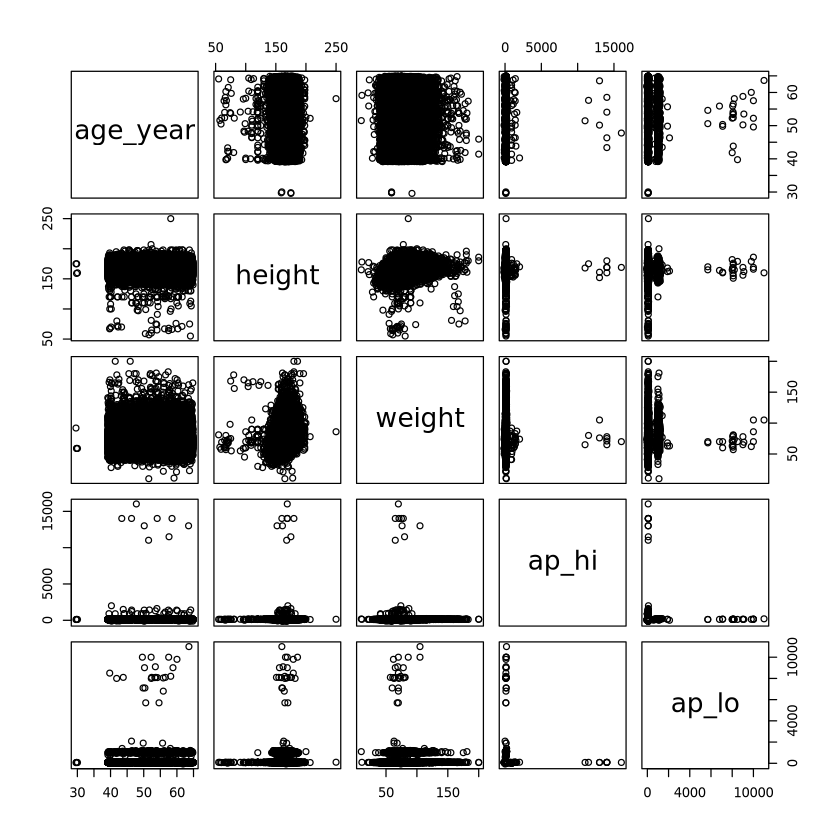

In [12]:
# Pairwise comparison
par(bg="white")
pairs(data[,quantitative.rows])

## Data distribution differences across cardiovascular condition


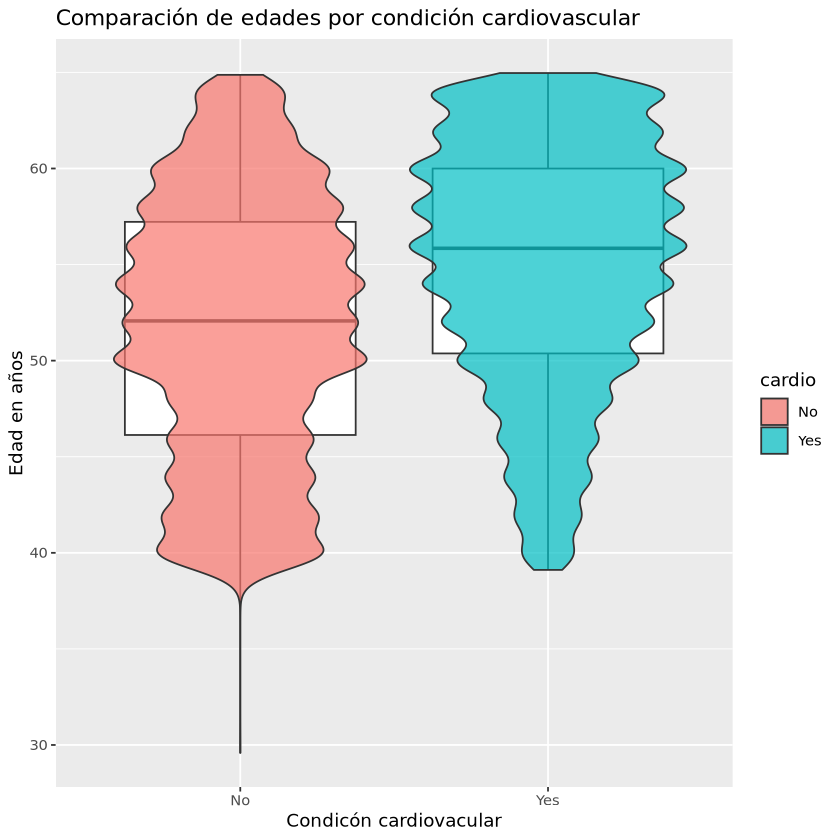

In [13]:
ggplot(data, aes(x=cardio, y=age_year, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.7, ) +
 labs(title = "Comparación de edades por condición cardiovascular", x = "Condicón cardiovacular", y="Edad en años") 

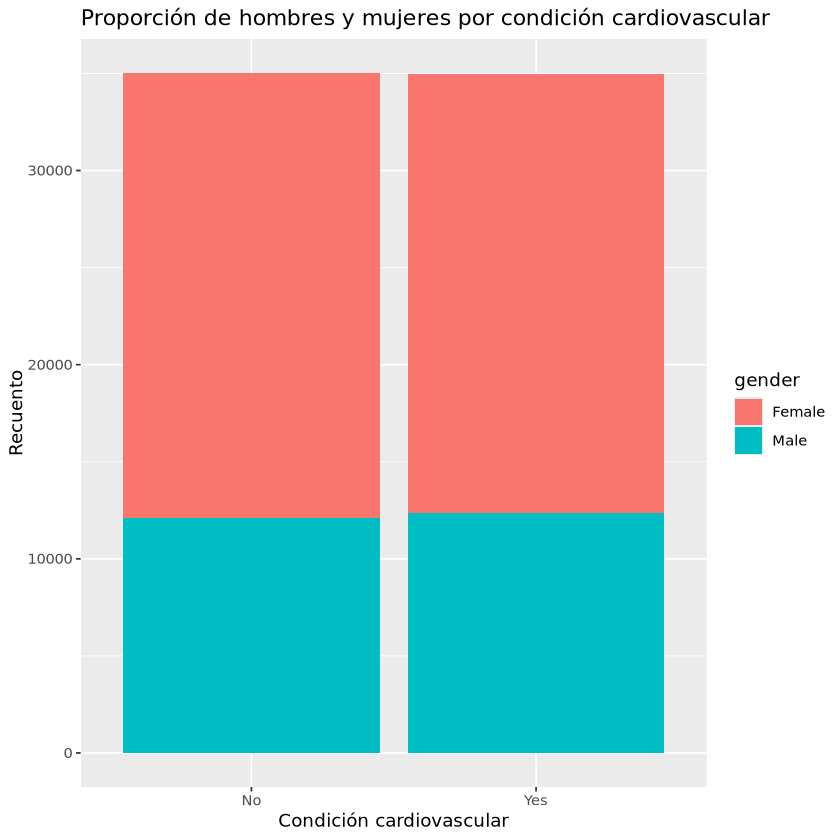

In [14]:
ggplot(data, aes(x=cardio, fill=gender)) +
 geom_bar() +
 labs(title = "Proporción de hombres y mujeres por condición cardiovascular", x = "Condición cardiovascular", y = "Recuento")

In [15]:
# Añadimos IMC para resumir la información del peso y la altura
data$IMC <- data$weight / ((data$height / 100)**2) 
head(data)

,age_year,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,IMC
,<dbl>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
0,50.39178,Male,168,62,110,80,Normal,Normal,No,No,Yes,No,21.96712
1,55.41918,Female,156,85,140,90,Well-Above-Normal,Normal,No,No,Yes,Yes,34.92768
2,51.66301,Female,165,64,130,70,Well-Above-Normal,Normal,No,No,No,Yes,23.50781
3,48.28219,Male,169,82,150,100,Normal,Normal,No,No,Yes,Yes,28.71048
4,47.87397,Female,156,56,100,60,Normal,Normal,No,No,No,No,23.01118
8,60.03836,Female,151,67,120,80,Above-Normal,Above-Normal,No,No,No,No,29.38468


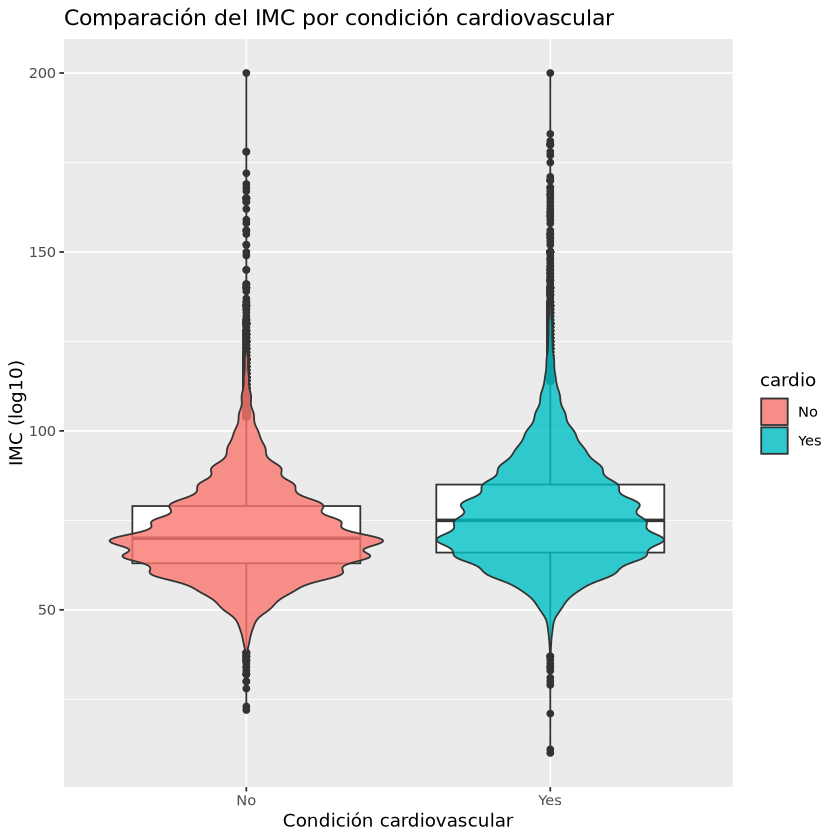

In [46]:
ggplot(data, aes(x=cardio, y=weight, fill=cardio)) + 
geom_boxplot(fill="white") +
geom_violin(alpha=0.8) +
labs(title = "Comparación del IMC por condición cardiovascular", x = "Condición cardiovascular", y = "IMC (log10)")

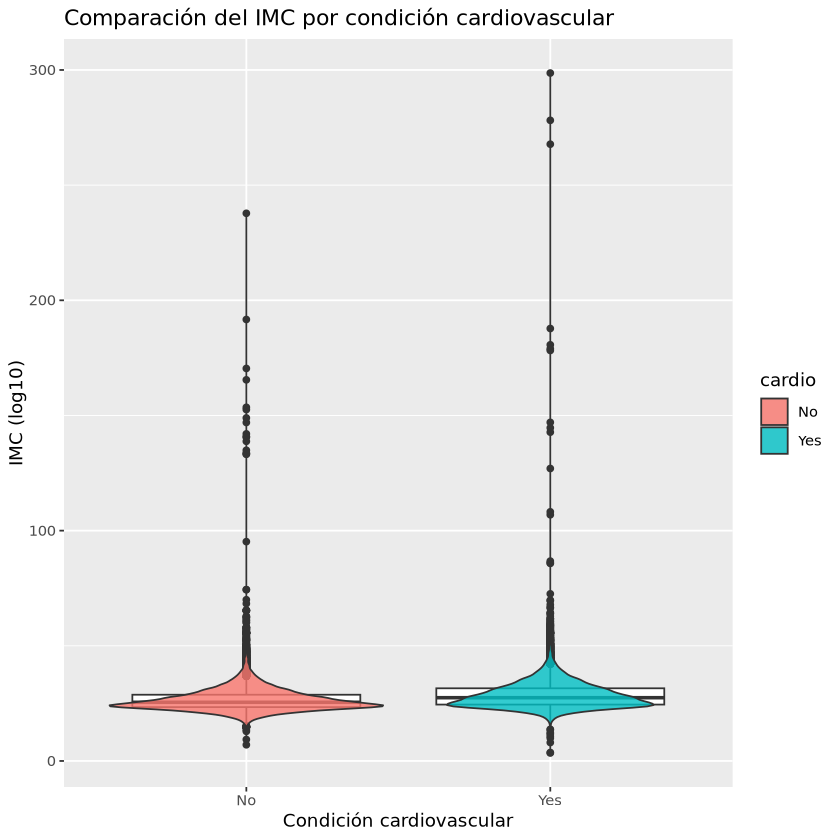

In [47]:
ggplot(data, aes(x=cardio, y=IMC, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Comparación del IMC por condición cardiovascular", x = "Condición cardiovascular", y = "IMC (log10)")

In [17]:
# Cardio
cardio.yes.quantile <- quantile(data[data$cardio == "Yes", "IMC"])
cardio.no.quantile <- quantile(data[data$cardio == "No", "IMC"])

cardio.yes.iq.range <- as.numeric(cardio.yes.quantile["75%"] - cardio.yes.quantile["25%"])
cardio.no.iq.range <- as.numeric(cardio.no.quantile["75%"] - cardio.no.quantile["25%"])

print("Cardio yes")
print(paste("Upper limit:", upper.limit <- as.numeric(cardio.yes.quantile["75%"] + 1.5*cardio.yes.iq.range)))
print(paste("Lower limit:", lower.limit <- as.numeric(cardio.yes.quantile["25%"] - 1.5*cardio.yes.iq.range)))
summary(cardio.yes.clean <- (data$IMC >= lower.limit & data$IMC <= upper.limit) | data$cardio == "No")

print("Cardio no")
print(paste("Upper limit:", upper.limit <- as.numeric(cardio.no.quantile["75%"] + 1.5*cardio.no.iq.range)))
print(paste("Lower limit:", lower.limit <- as.numeric(cardio.no.quantile["25%"] - 1.5*cardio.no.iq.range)))
summary(cardio.no.clean <- (data$IMC >= lower.limit & data$IMC <= upper.limit) | data$cardio == "Yes")

summary(data.imc.clean <- cardio.yes.clean & cardio.no.clean)

[1] "Cardio yes"


[1] "Upper limit: 42.1541950113379"
[1] "Lower limit: 13.891156462585"


   Mode   FALSE    TRUE 
logical     782   69218 

[1] "Cardio no"
[1] "Upper limit: 36.8268978418769"
[1] "Lower limit: 15.3257597879742"


   Mode   FALSE    TRUE 
logical    1263   68737 

   Mode   FALSE    TRUE 
logical    2045   67955 

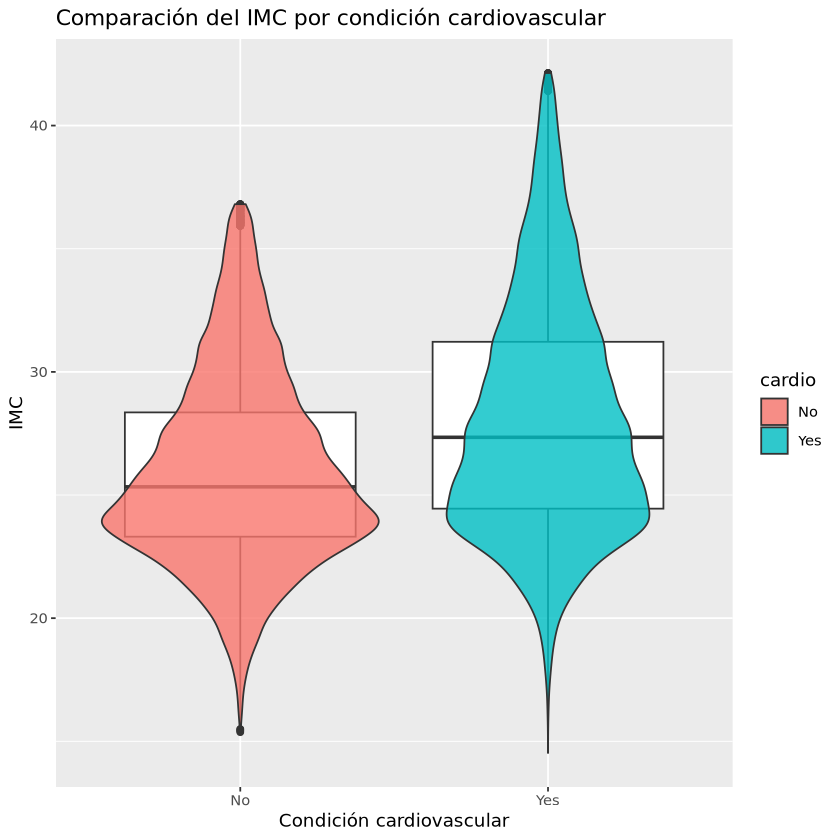

In [48]:
ggplot(data[data.imc.clean,], aes(x=cardio, y=IMC, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Comparación del IMC por condición cardiovascular", x = "Condición cardiovascular", y = "BMI")

In [19]:
summary(data[data.imc.clean,])

    age_year        gender          height          weight     
 Min.   :29.58   Female:43787   Min.   :120.0   Min.   : 28.0  
 1st Qu.:48.38   Male  :24168   1st Qu.:159.0   1st Qu.: 65.0  
 Median :53.98                  Median :165.0   Median : 71.0  
 Mean   :53.33                  Mean   :164.6   Mean   : 73.2  
 3rd Qu.:58.42                  3rd Qu.:170.0   3rd Qu.: 81.0  
 Max.   :64.97                  Max.   :207.0   Max.   :147.0  
     ap_hi             ap_lo                     cholesterol   
 Min.   : -150.0   Min.   :  -70.00   Normal           :51067  
 1st Qu.:  120.0   1st Qu.:   80.00   Above-Normal     : 9191  
 Median :  120.0   Median :   80.00   Well-Above-Normal: 7697  
 Mean   :  128.5   Mean   :   96.27                            
 3rd Qu.:  140.0   3rd Qu.:   90.00                            
 Max.   :16020.0   Max.   :11000.00                            
                gluc       smoke        alco       active      cardio     
 Normal           :57955   No

In [20]:
summary(data.imc.clean <- data.imc.clean & data$weight > 40)

   Mode   FALSE    TRUE 
logical    2123   67877 

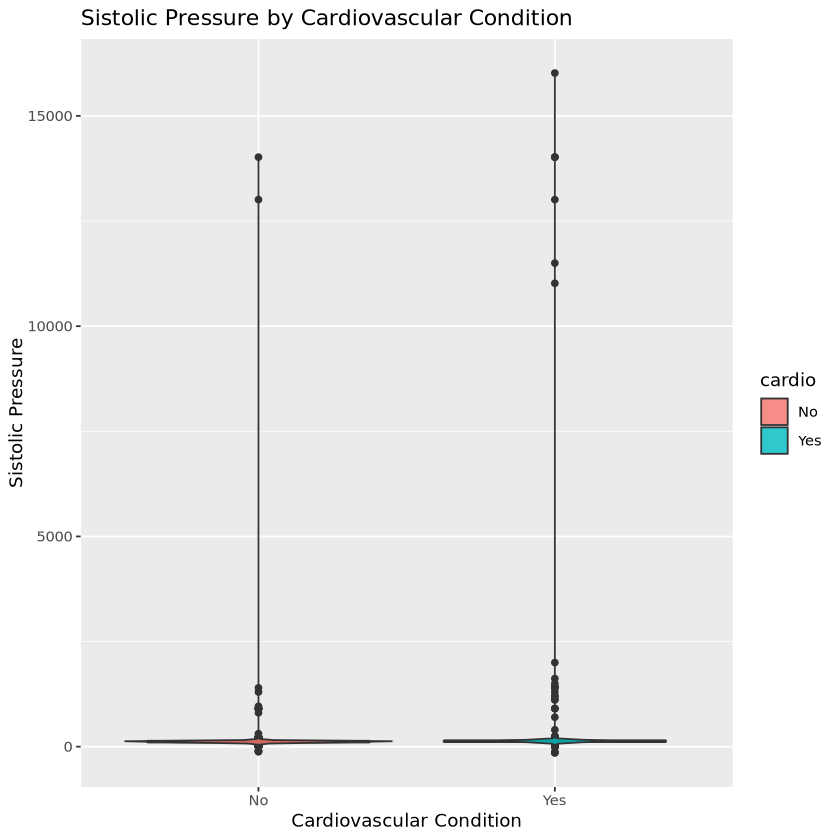

In [50]:
ggplot(data, aes(x=cardio, y=ap_hi, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Sistolic Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Sistolic Pressure")

Las anomalías más claras se encuentran en las presiones. Estas presiones deben ser números positivos que normalmente se encuentran entre 120 (presión sistólica) y 80 (presión diastólica). A su vez, la presión sistólica debería ser mayor que la presión diastólica.

In [22]:
summary(data[, c("ap_hi", "ap_lo")])

     ap_hi             ap_lo         
 Min.   : -150.0   Min.   :  -70.00  
 1st Qu.:  120.0   1st Qu.:   80.00  
 Median :  120.0   Median :   80.00  
 Mean   :  128.8   Mean   :   96.63  
 3rd Qu.:  140.0   3rd Qu.:   90.00  
 Max.   :16020.0   Max.   :11000.00  

In [23]:
data.temp <- data[data$ap_hi > 50 & data$ap_hi < 200 & data$ap_lo > 50 & data$ap_lo < 200,]

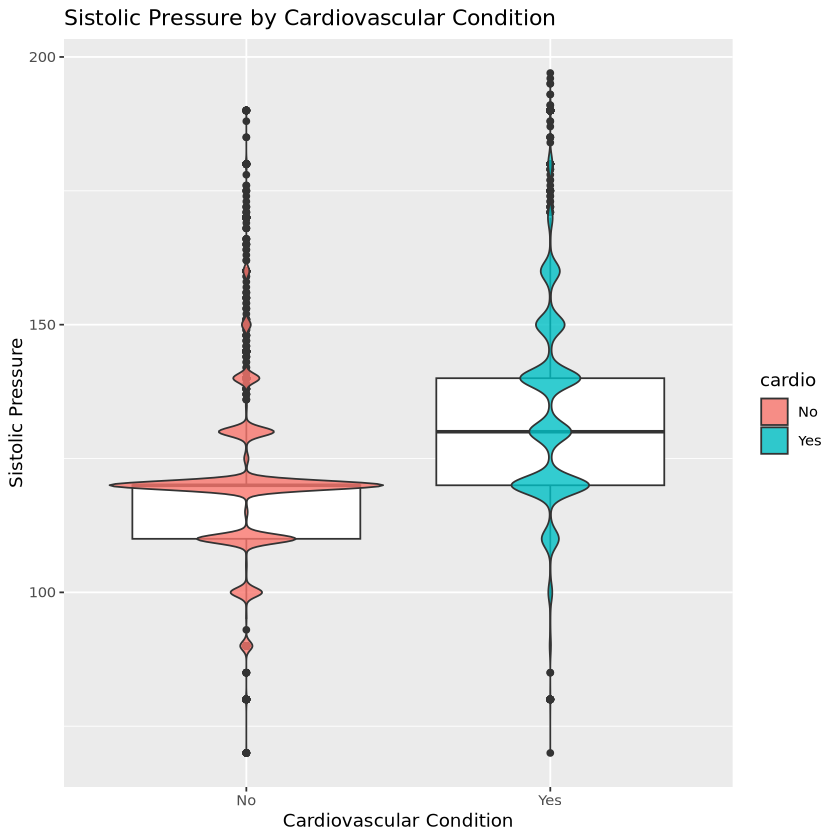

In [51]:
ggplot(data.temp, aes(x=cardio, y=ap_hi, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Sistolic Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Sistolic Pressure")

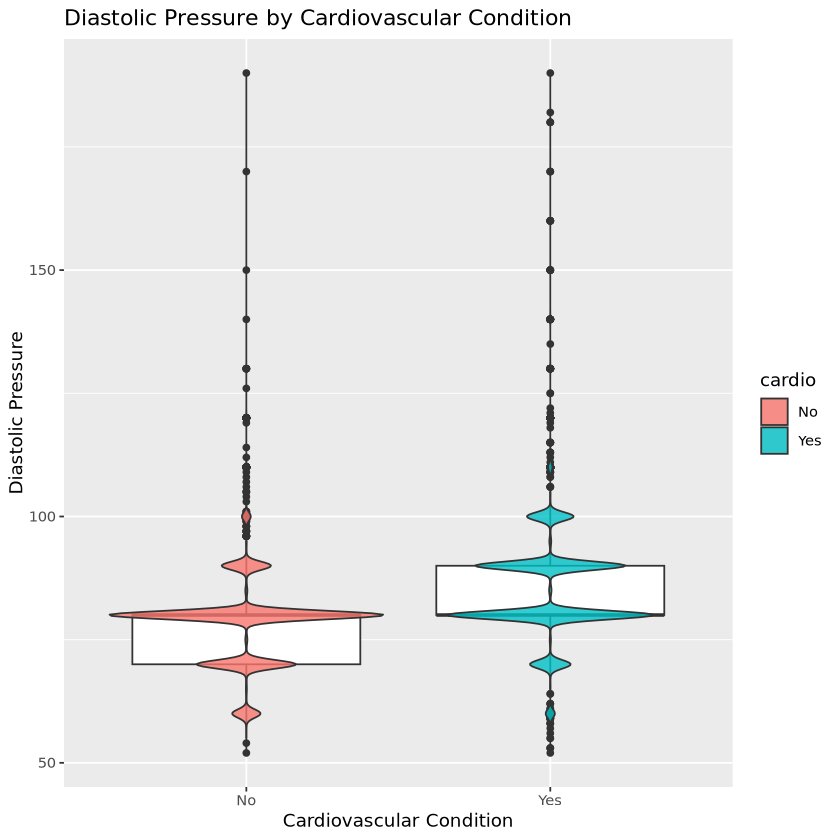

In [52]:
ggplot(data.temp, aes(x=cardio, y=ap_lo, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Diastolic Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Diastolic Pressure")

In [26]:
ap_hi.quantile <- quantile(data.temp$ap_hi[data.temp$cardio == "Yes"])
ap_lo.quantile <- quantile(data.temp$ap_lo[data.temp$cardio == "Yes"])
ap_hi.iq.range <- as.numeric(ap_hi.quantile["75%"] - ap_hi.quantile["25%"])
ap_lo.iq.range <- as.numeric(ap_lo.quantile["75%"] - ap_lo.quantile["25%"])
print("Cariovascular disease systolic pressure")
print(paste("Systolic lpper limit:", ap_hi.upper.limit <- as.numeric(ap_hi.quantile["75%"] + 1.5*ap_hi.iq.range)))
print(paste("Systolic lower limit:", ap_hi.lower.limit <- as.numeric(ap_hi.quantile["25%"] - 1.5*ap_hi.iq.range)))
summary(cardio.yes.ap_hi.clean <- (data$ap_hi >= ap_hi.lower.limit & data$ap_hi <= ap_hi.upper.limit) | data$cardio == "No")
print("Cariovascular disease diastolic pressure")
print(paste("Dyastolic upper limit:", ap_lo.upper.limit <- as.numeric(ap_lo.quantile["75%"] + 1.5*ap_lo.iq.range)))
print(paste("Diastolic lower limit:", ap_lo.lower.limit <- as.numeric(ap_lo.quantile["25%"] - 1.5*ap_lo.iq.range)))
summary(cardio.yes.ap_lo.clean <- (data$ap_lo >= ap_lo.lower.limit & data$ap_lo <= ap_lo.upper.limit) | data$cardio == "No")

[1] "Cariovascular disease systolic pressure"
[1] "Systolic lpper limit: 170"


[1] "Systolic lower limit: 90"


   Mode   FALSE    TRUE 
logical    1086   68914 

[1] "Cariovascular disease diastolic pressure"
[1] "Dyastolic upper limit: 105"
[1] "Diastolic lower limit: 65"


   Mode   FALSE    TRUE 
logical    2147   67853 

In [27]:
ap_hi.quantile <- quantile(data.temp$ap_hi[data.temp$cardio == "No"])
ap_lo.quantile <- quantile(data.temp$ap_lo[data.temp$cardio == "No"])
ap_hi.iq.range <- as.numeric(ap_hi.quantile["75%"] - ap_hi.quantile["25%"])
ap_lo.iq.range <- as.numeric(ap_lo.quantile["75%"] - ap_lo.quantile["25%"])
print(paste("Systolic upper limit:", ap_hi.upper.limit <- as.numeric(ap_hi.quantile["75%"] + 1.5*ap_hi.iq.range)))
print(paste("Systolic lower limit:", ap_hi.lower.limit <- as.numeric(ap_hi.quantile["25%"] - 1.5*ap_hi.iq.range)))
summary(cardio.no.ap_hi.clean <- (data$ap_hi >= ap_hi.lower.limit & data$ap_hi <= ap_hi.upper.limit) | data$cardio == "Yes")
print(paste("Dyastolic upper limit:", ap_lo.upper.limit <- as.numeric(ap_lo.quantile["75%"] + 1.5*ap_lo.iq.range)))
print(paste("Diastolic lower limit:", ap_lo.lower.limit <- as.numeric(ap_lo.quantile["25%"] - 1.5*ap_lo.iq.range)))
summary(cardio.no.ap_lo.clean <- (data$ap_lo >= ap_lo.lower.limit & data$ap_lo <= ap_lo.upper.limit) | data$cardio == "Yes")

[1] "Systolic upper limit: 135"


[1] "Systolic lower limit: 95"


   Mode   FALSE    TRUE 
logical    4164   65836 

[1] "Dyastolic upper limit: 95"
[1] "Diastolic lower limit: 55"


   Mode   FALSE    TRUE 
logical    1061   68939 

In [28]:
summary(data.pressure.clean <- cardio.yes.ap_hi.clean & cardio.yes.ap_lo.clean & cardio.no.ap_hi.clean & cardio.no.ap_lo.clean)

   Mode   FALSE    TRUE 
logical    7164   62836 

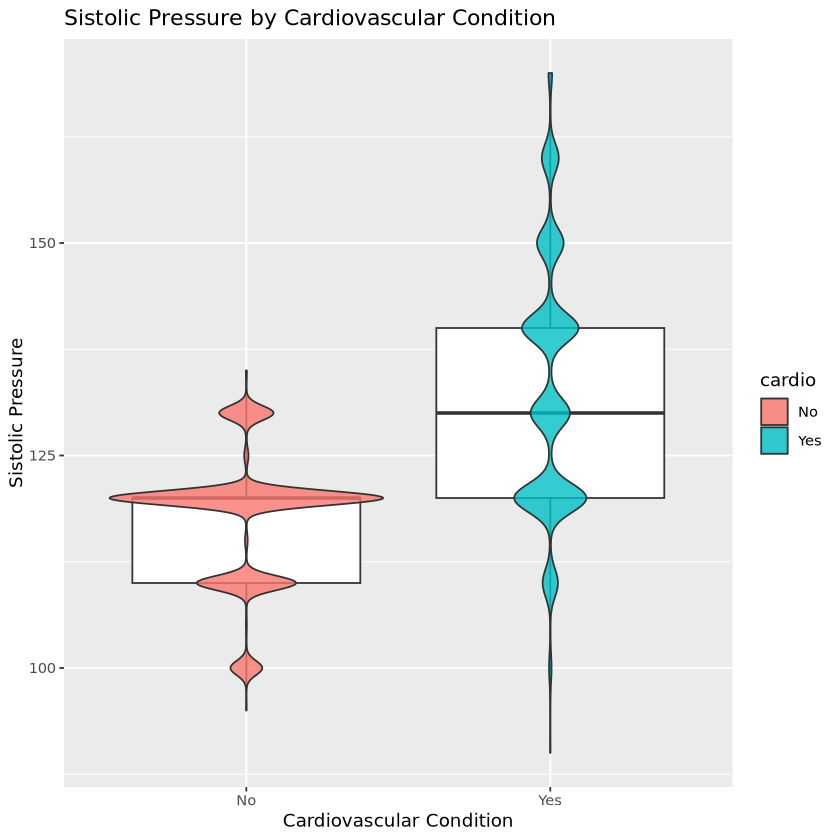

In [53]:
ggplot(data[data.pressure.clean,], aes(x=cardio, y=ap_hi, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Sistolic Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Sistolic Pressure")

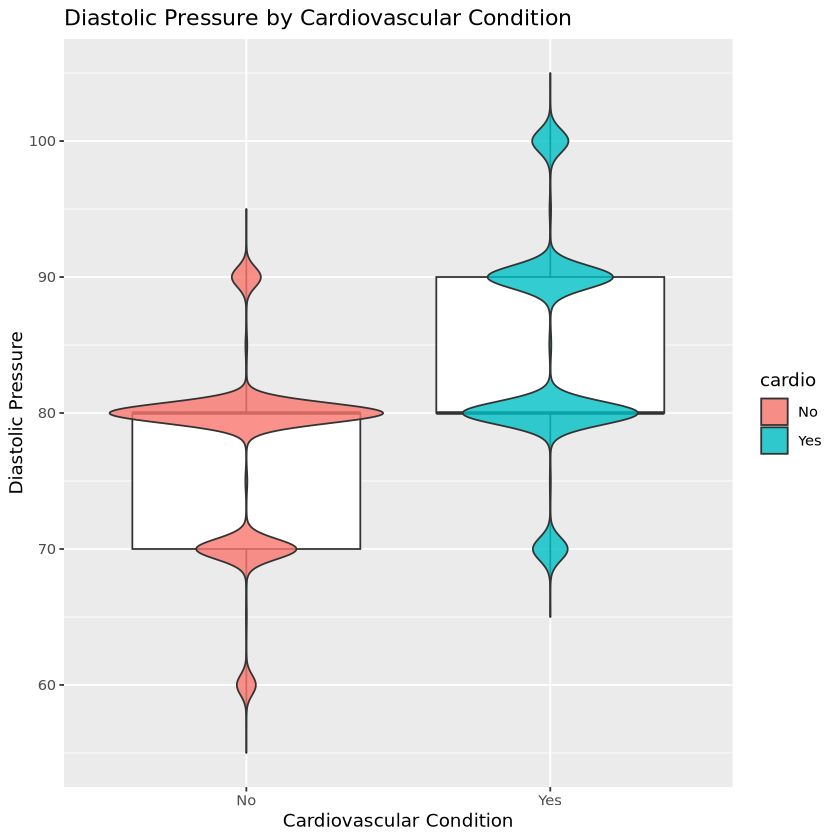

In [54]:
ggplot(data[data.pressure.clean, ], aes(x=cardio, y=ap_lo, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Diastolic Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Diastolic Pressure")

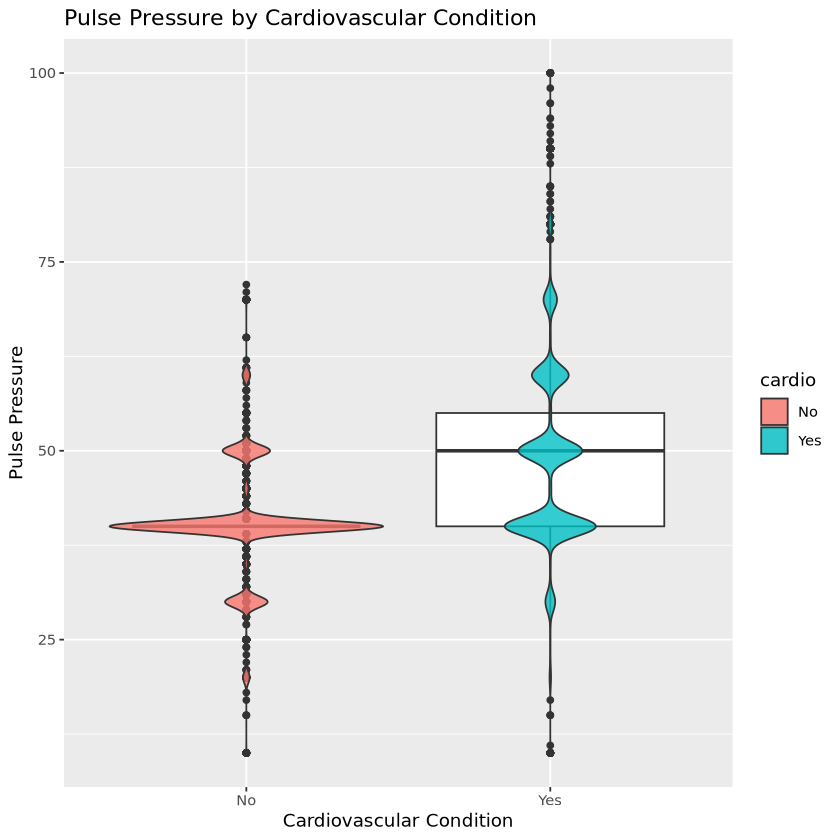

In [56]:
ggplot(data.clean, aes(x=cardio, y=pulse, fill=cardio)) +
 geom_boxplot(fill="white") +
 geom_violin(alpha=0.8) +
 labs(title = "Pulse Pressure by Cardiovascular Condition", x = "Cardiovascular Condition", y = "Pulse Pressure")

In [31]:
# Verify pulse pressure
data$pulse <- data$ap_hi - data$ap_lo

In [32]:
summary(data)

summary(data.clean <- data[data.imc.clean & data.pressure.clean & data$pulse >= 10 & data$pulse <= 100, ])

    age_year        gender          height          weight      
 Min.   :29.58   Female:45530   Min.   : 55.0   Min.   : 10.00  
 1st Qu.:48.39   Male  :24470   1st Qu.:159.0   1st Qu.: 65.00  
 Median :53.98                  Median :165.0   Median : 72.00  
 Mean   :53.34                  Mean   :164.4   Mean   : 74.21  
 3rd Qu.:58.43                  3rd Qu.:170.0   3rd Qu.: 82.00  
 Max.   :64.97                  Max.   :250.0   Max.   :200.00  
     ap_hi             ap_lo                     cholesterol   
 Min.   : -150.0   Min.   :  -70.00   Normal           :52385  
 1st Qu.:  120.0   1st Qu.:   80.00   Above-Normal     : 9549  
 Median :  120.0   Median :   80.00   Well-Above-Normal: 8066  
 Mean   :  128.8   Mean   :   96.63                            
 3rd Qu.:  140.0   3rd Qu.:   90.00                            
 Max.   :16020.0   Max.   :11000.00                            
                gluc       smoke        alco       active      cardio     
 Normal           :594

    age_year        gender          height          weight      
 Min.   :29.58   Female:39477   Min.   :125.0   Min.   : 41.00  
 1st Qu.:48.29   Male  :21738   1st Qu.:160.0   1st Qu.: 65.00  
 Median :53.95                  Median :165.0   Median : 71.00  
 Mean   :53.27                  Mean   :164.7   Mean   : 73.09  
 3rd Qu.:58.38                  3rd Qu.:170.0   3rd Qu.: 80.00  
 Max.   :64.97                  Max.   :207.0   Max.   :147.00  
     ap_hi           ap_lo                   cholesterol   
 Min.   : 90.0   Min.   : 55.00   Normal           :46567  
 1st Qu.:120.0   1st Qu.: 80.00   Above-Normal     : 7950  
 Median :120.0   Median : 80.00   Well-Above-Normal: 6698  
 Mean   :125.4   Mean   : 80.95                            
 3rd Qu.:130.0   3rd Qu.: 90.00                            
 Max.   :170.0   Max.   :105.00                            
                gluc       smoke        alco       active      cardio     
 Normal           :52538   No :55811   No :57986  

In [33]:
dim(data.clean)

[1] 61215    14

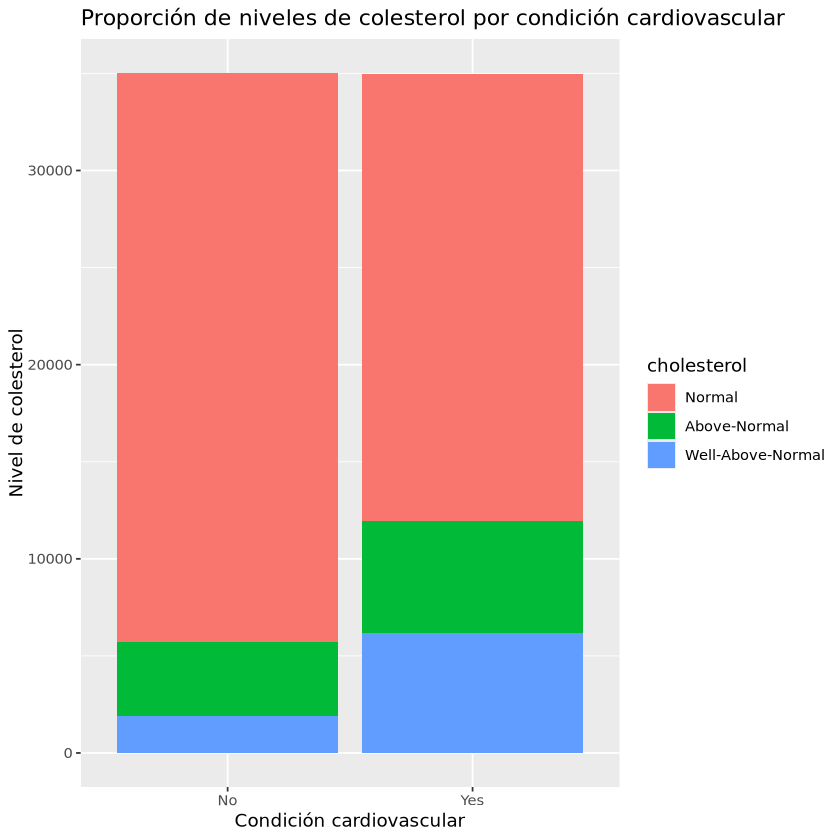

In [34]:
ggplot(data, aes(x=cardio, fill=cholesterol)) +
 geom_bar() +
 labs(title = "Proporción de niveles de colesterol por condición cardiovascular", x = "Condición cardiovascular", y = "Nivel de colesterol")

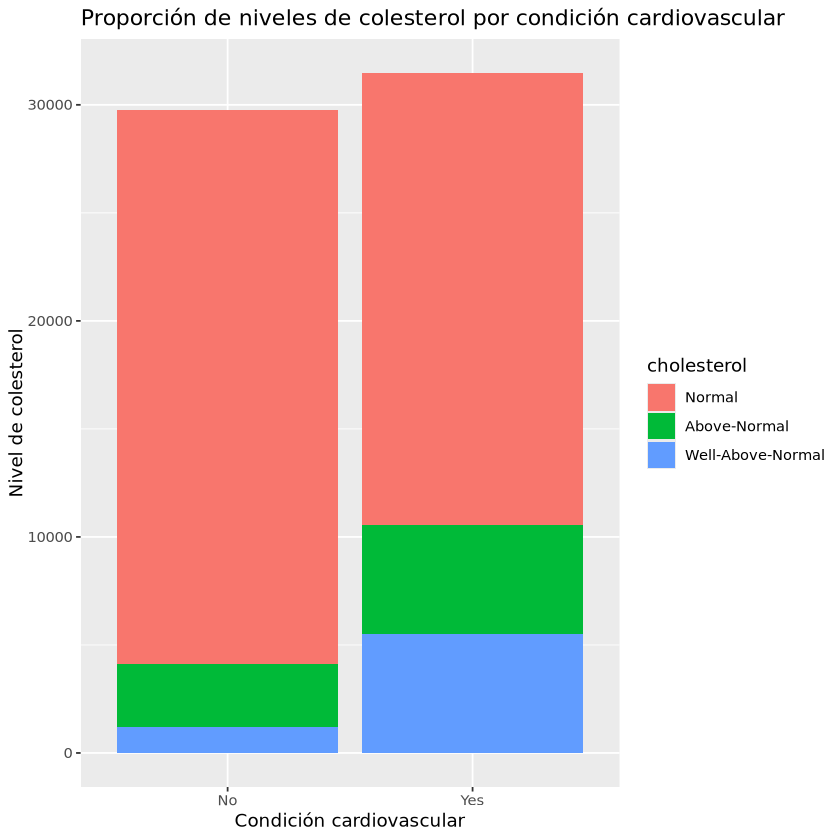

In [35]:
ggplot(data.clean, aes(x=cardio, fill=cholesterol)) +
 geom_bar() +
 labs(title = "Proporción de niveles de colesterol por condición cardiovascular", x = "Condición cardiovascular", y = "Nivel de colesterol")

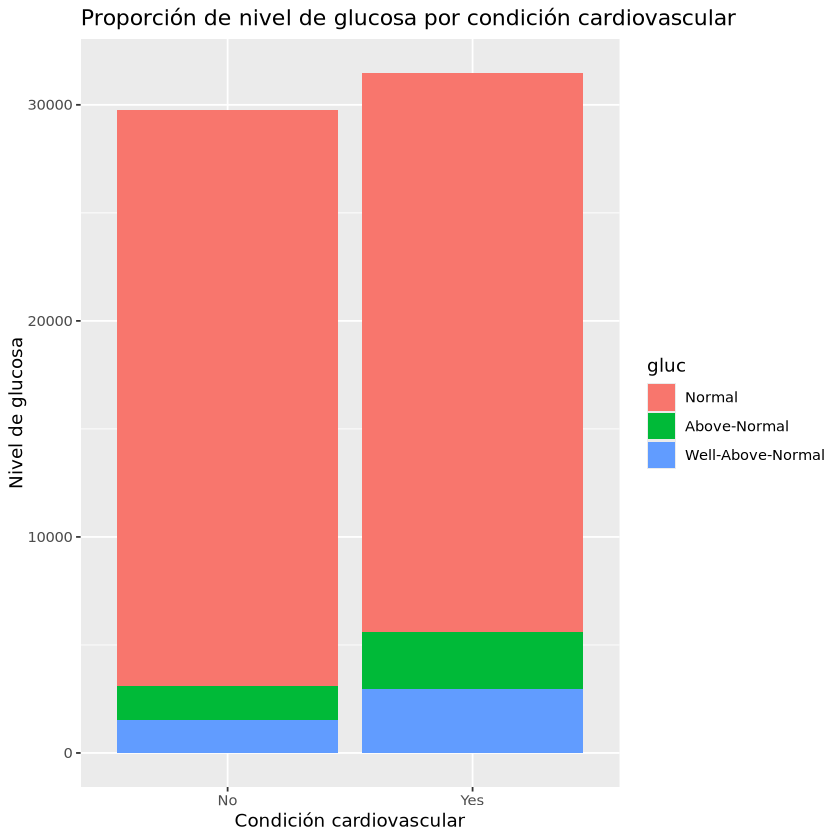

In [36]:
ggplot(data.clean, aes(x=cardio, fill=gluc)) +
 geom_bar() +
 labs(title = "Proporción de nivel de glucosa por condición cardiovascular", x = "Condición cardiovascular", y = "Nivel de glucosa")

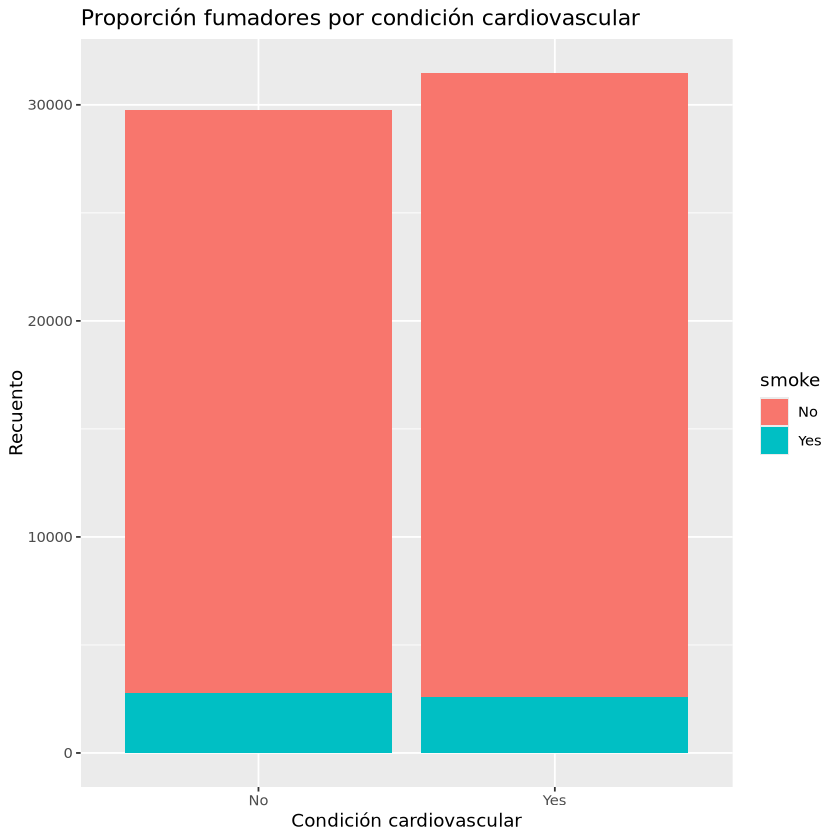

In [37]:
ggplot(data.clean, aes(x=cardio, fill=smoke)) +
 geom_bar() +
 labs(title = "Proporción fumadores por condición cardiovascular", x = "Condición cardiovascular", y = "Recuento")

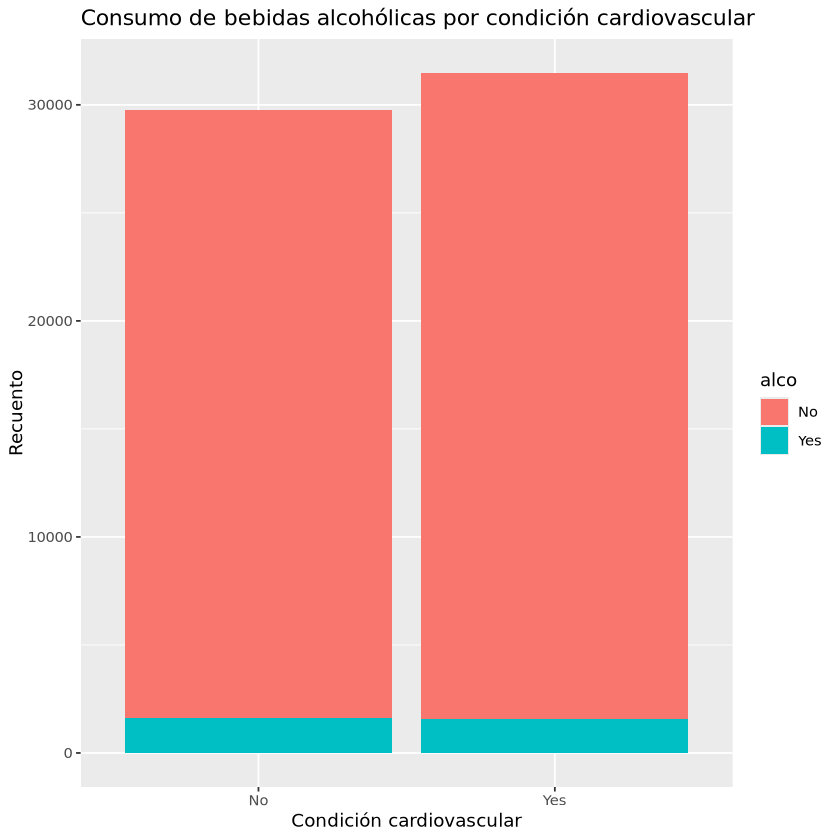

In [38]:
ggplot(data.clean, aes(x=cardio, fill=alco)) +
 geom_bar() +
 labs(title = "Consumo de bebidas alcohólicas por condición cardiovascular", x = "Condición cardiovascular", y = "Recuento")


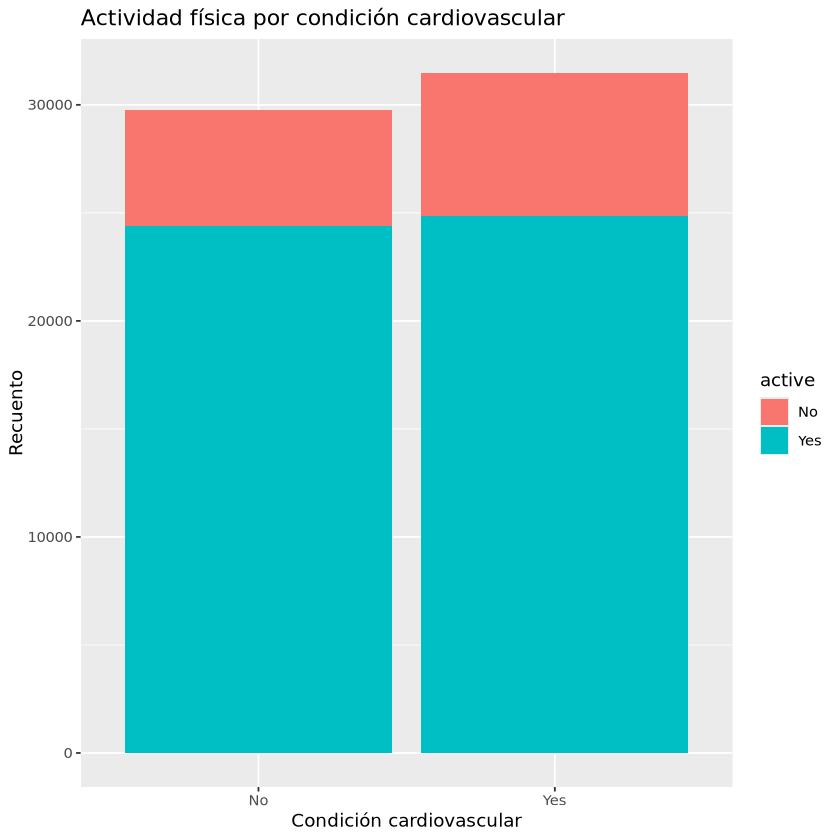

In [39]:
ggplot(data.clean, aes(x=cardio, fill=active)) +
 geom_bar() +
 labs(title = "Actividad física por condición cardiovascular", x = "Condición cardiovascular", y = "Recuento")

In [40]:
write.csv(data.clean, "../results/cardiovascular_disease_clean.csv", row.names=FALSE)


In [41]:
data.clean <- read.csv("../results/cardiovascular_disease_clean.csv")

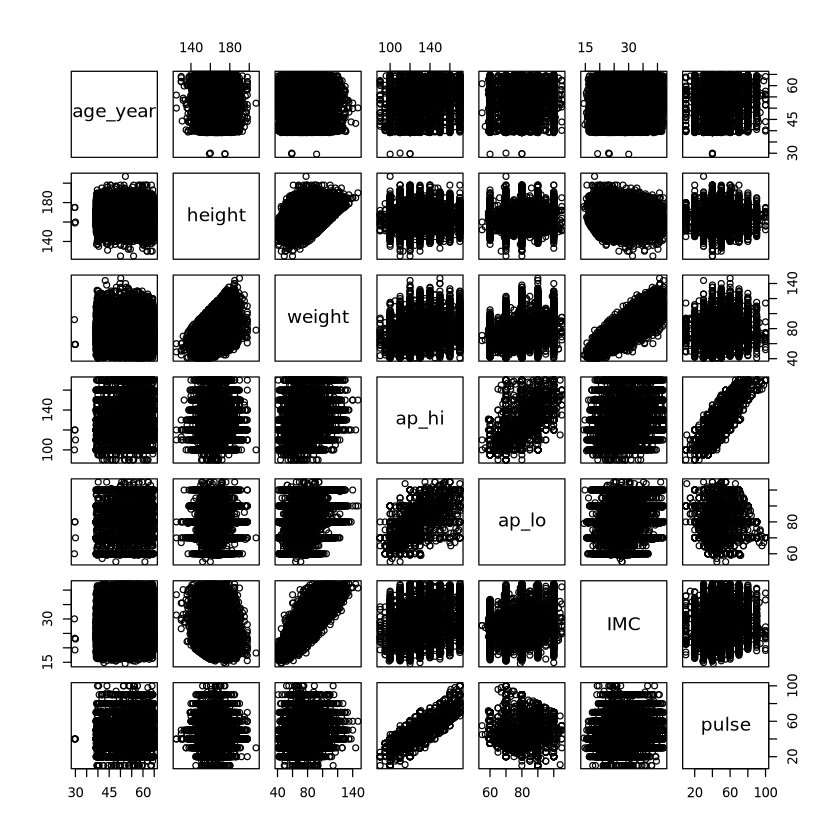

In [42]:
par(bg="white")
pairs(data.clean[,c(1,3,4,5,6,13,14)])

In [43]:
cor(data.clean[,c(1,3,4,5,6,13,14)], method = "p")
cor(data.clean[,c(1,3,4,5,6,13,14)], method = "s")

,age_year,height,weight,ap_hi,ap_lo,IMC,pulse
age_year,1.00000000,-0.091342910,0.05545969,0.207000348,0.15814965,0.1138051,0.16153816
height,-0.09134291,1.000000000,0.37499804,0.007937181,0.02686391,-0.1818877,-0.01042288
weight,0.05545969,0.374998037,1.00000000,0.255960236,0.23776313,0.8390205,0.16602576
ap_hi,0.20700035,0.007937181,0.25596024,1.000000000,0.70760894,0.2674123,0.82543207
ap_lo,0.15814965,0.026863911,0.23776313,0.707608939,1.00000000,0.2370137,0.18520397
IMC,0.11380512,-0.181887676,0.83902050,0.267412277,0.23701366,1.0000000,0.18255128
pulse,0.16153816,-0.010422876,0.16602576,0.825432070,0.18520397,0.1825513,1.00000000


,age_year,height,weight,ap_hi,ap_lo,IMC,pulse
age_year,1.00000000,-0.086774817,0.05789343,0.21735450,0.15371462,0.1088697,0.165586893
height,-0.08677482,1.000000000,0.35356485,0.01751426,0.02591771,-0.1668813,-0.005837029
weight,0.05789343,0.353564852,1.00000000,0.25843297,0.22979621,0.8357962,0.167891005
ap_hi,0.21735450,0.017514260,0.25843297,1.00000000,0.71980293,0.2643269,0.787324713
ap_lo,0.15371462,0.025917711,0.22979621,0.71980293,1.00000000,0.2294010,0.214908833
IMC,0.10886970,-0.166881251,0.83579616,0.26432687,0.22940097,1.0000000,0.180598766
pulse,0.16558689,-0.005837029,0.16789100,0.78732471,0.21490883,0.1805988,1.000000000


- https://www.niddk.nih.gov/health-information/health-statistics/overweight-obesity
- https://lipidworld.biomedcentral.com/articles/10.1186/s12944-023-01920-1#:~:text=Correlation%20analysis%20revealed%20that%20BMI,0.284%2C%20P%20%3C%200.001).
- https://www.nhlbi.nih.gov/health/high-blood-pressure
- https://www.ncbi.nlm.nih.gov/books/NBK482408/#:~:text=A%20normal%20young%20adult%20at,C%20=%20Delta%20V/Delta%20P